# Install 2.0 and GPU setup

In [1]:
 pip install tensorflow==2.0.0-beta1 

  Using cached https://files.pythonhosted.org/packages/29/6c/2c9a5c4d095c63c2fb37d20def0e4f92685f7aee9243d6aae25862694fd1/tensorflow-2.0.0b1-cp36-cp36m-manylinux1_x86_64.whl


## Imports

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-beta1'

# Data Preprocessing


### Loading the Cifar10 Dataset

In [3]:
#setting classnames in dataset

class_names = 'airplane automobile bird cat deer dog frog horse ship truck'.split(' ')
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
# load dataset
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

### Image Normalization

In [0]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

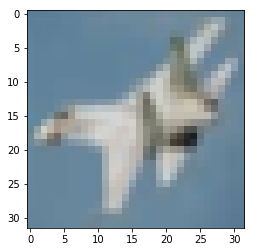

In [8]:
plt.imshow(X_test[10])

## Building a Convolutional Neural Network

### Defining the model
  

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

  * filters: 32
  * kernel_size: 3
  *padding: same
  * activation: relu
  * input_shape: (32, 32, 3)

In [0]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding ='same', activation = 'relu', input_shape=[32,32,3]))

### Adding second convolutional layer and max-pooling layer
 
 CNN layer hyper-parameters:
  * filters:32
  * kernel_size: 3
  * padding: same
  * activation: relu
  
MaxPool layer hyper-parameters:
  * pool_size: 2 
  * strides: 2 
  * padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

### Adding the third convolutional layer
cnn layer hyper-parameters:
  
    filters: 64
    kernel_size: 3
    padding: same
    activation: relu

In [0]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

###Adding the forth convolutional layer and the max-pooling layer

cnn layer hyper-parameters:

    filters: 64
    kernel-size: 3
    padding: same
    activation: relu
    
MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2 
    padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:

  * units/neurons: 10 (number of classes)
  * activation: softmax

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

**sparse_categorical_accuracy**

sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value. 

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [0]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer = 'Adam',
  metrics = ['sparse_categorical_accuracy']
)

In [20]:
model.fit(X_train,y_train,epochs=5)

W0802 15:37:46.499284 140353840801664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 280s 6ms/sample - loss: 1.3634 - sparse_categorical_accuracy: 0.5143
Epoch 2/5
50000/50000 [==============================] - 280s 6ms/sample - loss: 0.9104 - sparse_categorical_accuracy: 0.6848
Epoch 3/5
50000/50000 [==============================] - 281s 6ms/sample - loss: 0.7464 - sparse_categorical_accuracy: 0.7415
Epoch 4/5
50000/50000 [==============================] - 281s 6ms/sample - loss: 0.6456 - sparse_categorical_accuracy: 0.7789
Epoch 5/5
50000/50000 [==============================] - 280s 6ms/sample - loss: 0.5597 - sparse_categorical_accuracy: 0.8066


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 15s 1ms/sample - loss: 0.8311 - sparse_categorical_accuracy: 0.7324


In [22]:
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.7324000000953674
